##**Aula 2 - Bag Of Words - Word CLoud**

Para análise de sentimento, trata-se esse sentimento como "Polaridade", onde valor positivo até 1 é considerado um sentimento positivo e valores negativos como um sentimento negativo

In [1]:
# Aula 2 - Bag Of Word

In [2]:
import requests
import zipfile
from io import BytesIO
import pandas as pd

url_arquivo = "https://github.com/wesleymmauricio/curso-ia/raw/refs/heads/main/aulas/fase-2/dados/b2w.csv.zip"

response = requests.get(url_arquivo)

zip_file = zipfile.ZipFile(BytesIO(response.content))

with zip_file.open("b2w.csv") as file:
    avaliacoes = pd.read_csv(file)

avaliacoes.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [3]:
avaliacoes = avaliacoes.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis=1)

In [4]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


In [5]:
avaliacoes.dropna(inplace=True, axis=0)

In [6]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116058 entries, 0 to 132372
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_text  116058 non-null  object 
 1   polarity     116058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


In [7]:
avaliacoes.polarity.value_counts()

,count
polarity,
1.0,80300
0.0,35758


In [8]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(avaliacoes.review_text, avaliacoes.polarity, test_size=0.2,
                                                        random_state=78, stratify=avaliacoes.polarity)
# classe_teste
# y_teste

In [9]:
# from sklearn.linear_model import LogisticRegression

# logistic_regression = LogisticRegression()
# logistic_regression.fit(x_treino, y_treino)

# acuracia = logistic_regression.score(x_teste, y_teste)
# print(f"Acurácia: {acuracia}")

**Bag Of Word (Saco de Palavras)**

É uma técnica do NLP (Natural Language Processing)  para converter valores categoróricos em valores numéricos (compreensiveis para máquina). Esta técnica contabiliza a frequência de todas as palavras utilizadas no texto.

Ex.:

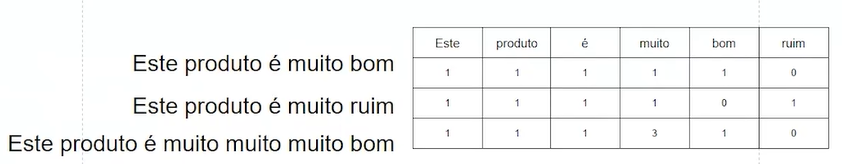

In [10]:
# Exemplo de como vetorizar (criar o bag of word).
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Este produto é muito bom", "Este produto é muito ruim", "Este produto é muito muito muito ruim"]
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (3, 5)>

In [11]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa

,bom,este,muito,produto,ruim
0,1,1,1,1,0
1,0,1,1,1,1
2,0,1,3,1,1


In [12]:
#vetorizar = CountVectorizer() #(116058, 50508) Desta forma, sem limitar, foi identificado uma quantidade muito grande de palavras
vetorizar = CountVectorizer(max_features=100) # Desta forma, setamos um limite de 100 palavras com maior frequencia
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, avaliacoes.polarity, test_size=0.2,
                                                        stratify=avaliacoes.polarity, random_state=78)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_treino, y_treino)
acuracia = logistic_regression.score(x_teste, y_teste) # Avalia o modelo e calcula a acuracia, sem a necessidade de executar o metodo predict
print(acuracia)
# y_predito = logistic_regression.predict(x_teste) Não precisa por conta do uso do método .score


0.8897983801481992


In [15]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100)
  bag_of_words = vetorizar.fit_transform(dados[coluna_texto])

  x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, dados[coluna_sentimento], test_size=0.2,
                                                        stratify=dados[coluna_sentimento], random_state=78)

  logistic_regression = LogisticRegression()
  logistic_regression.fit(x_treino, y_treino)
  return logistic_regression.score(x_teste, y_teste)


In [16]:
acuracia = treinar_modelo(avaliacoes, "review_text", "polarity")
print(acuracia)

0.8897983801481992


In [17]:
#***************************************************************
#  Aula 2 - Cloud Word
#***************************************************************

In [18]:
todas_avaliacoes = [avaliacao for avaliacao in avaliacoes.review_text]
todas_palavras = " ".join(todas_avaliacoes)

In [19]:
len(todas_avaliacoes)

116058

In [20]:
len(todas_palavras)

16570763

In [21]:
from wordcloud import WordCloud

nuvem_palavras = WordCloud().generate(todas_palavras)

In [22]:
nuvem_palavras

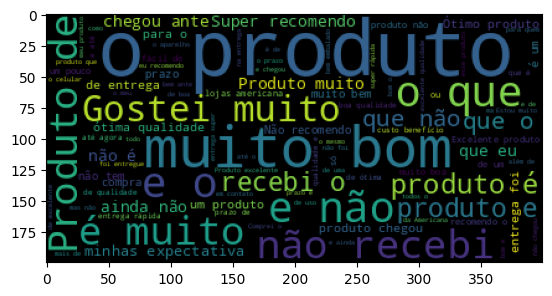

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)

In [24]:
nuvem_palavras = WordCloud(width=800, height=400, background_color="white", max_font_size=100).generate(todas_palavras)

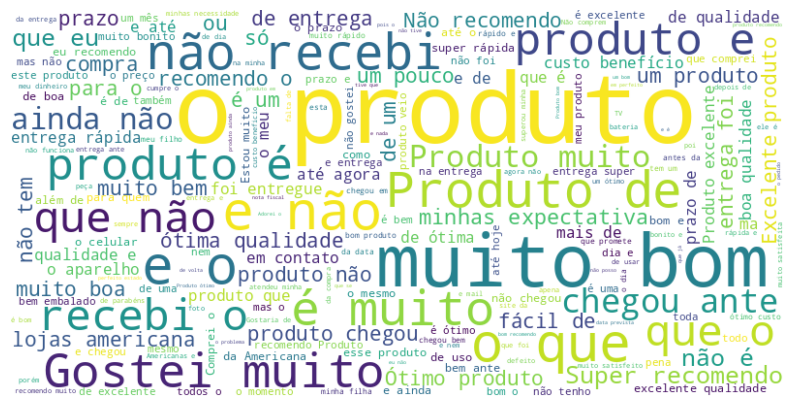

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
def word_cloud_neg(dados, coluna_texto):
  dados_filtrados = dados.query("polarity == 0")
  todas_avaliacoes = [avaliacao for avaliacao in dados_filtrados[coluna_texto]]
  todas_palavras = " ".join(todas_avaliacoes)

  nuvem_palavras = WordCloud(width=800, height=400, background_color="white",
                             max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [27]:
def word_cloud_pos(dados, coluna_texto):
  dados_filtrados = dados.query("polarity == 1")
  todas_avaliacoes = [avaliacao for avaliacao in dados_filtrados[coluna_texto]]
  todas_palavras = " ".join(todas_avaliacoes)

  nuvem_palavras = WordCloud(width=800, height=400, background_color="white",
                             max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

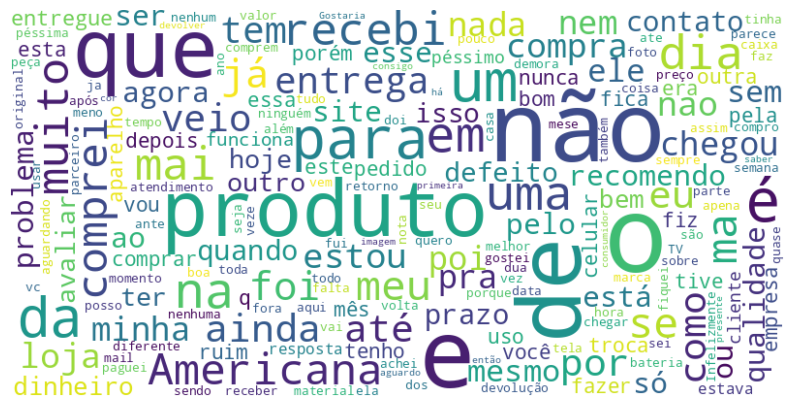

In [28]:
word_cloud_neg(avaliacoes, 'review_text')

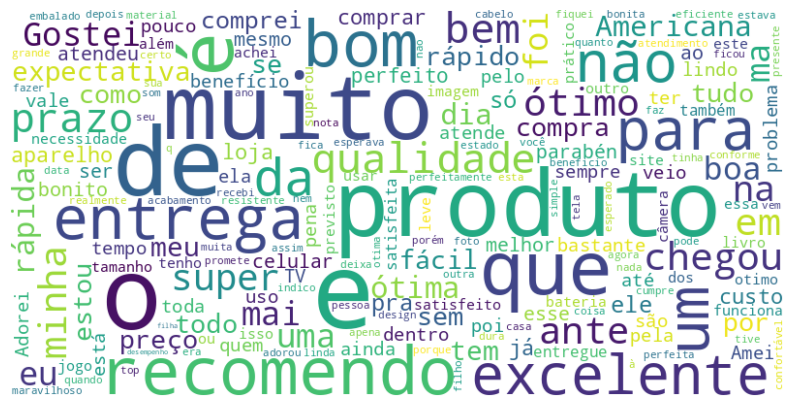

In [29]:
word_cloud_pos(avaliacoes, 'review_text')

##**Aula 3 - Tokenização com NLTK e Remoção Stop Words**##

In [30]:
# NLTK - Natural Languagem Toolkit

In [31]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [32]:
corpus = ["Muito bom este produto", "Muito ruim este produto"]
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'Muito bom este produto': 1, 'Muito ruim este produto': 1})

In [33]:
# Exemplo de como funciona a tokenização utilizando o nltk
from nltk import tokenize

frase = "Muito bom este produto"

token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(frase)
token_frase

['Muito', 'bom', 'este', 'produto']

In [34]:
# Na pratica agora
token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
# É possível notar que as palavras como 'e', 'o', 'que', e etc, possuem uma grande frenquencias nos tokens, entretanto sem nenhum valor para análise
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [35]:
# Convertendo em Dataframe para manipular e visualizar melhor os dados
dataframe_frequencia = pd.DataFrame({"palavras": list(frequencia.keys()), "frequencia": list(frequencia.values())})
dataframe_frequencia.head()

,palavras,frequencia
0,Bem,413
1,macio,216
2,e,89308
3,felpudo...recomendo.,1
4,Preço,334


In [36]:
dataframe_frequencia.nlargest(columns="frequencia", n=10)

,palavras,frequencia
2,e,89308
20,o,76053
17,de,75791
39,a,66640
50,que,53574
33,não,44253
23,do,36776
43,muito,36566
60,é,36314
21,produto,34983


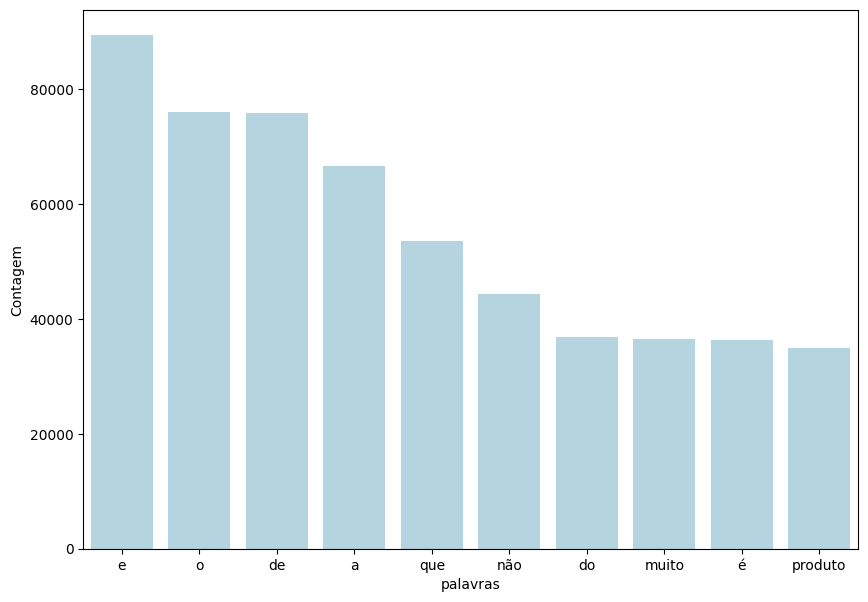

In [37]:
import seaborn as sns

plt.figure(figsize=(10,7))
ax = sns.barplot(data=dataframe_frequencia.nlargest(columns="frequencia", n=10), x="palavras", y="frequencia", color="lightblue")
ax.set(ylabel="Contagem")
plt.show()

In [38]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
  token_por_espaco = tokenize.WhitespaceTokenizer()
  token_frase = token_por_espaco.tokenize(todas_palavras)

  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({"palavras": list(frequencia.keys()), "frequencia": list(frequencia.values())})
  dataframe_frequencia = dataframe_frequencia.nlargest(columns="frequencia", n=quantidade)

  plt.figure(figsize=(10,7))
  ax = sns.barplot(data=dataframe_frequencia, x="palavras", y="frequencia", color="lightblue")
  ax.set(ylabel="Contagem")
  plt.show()

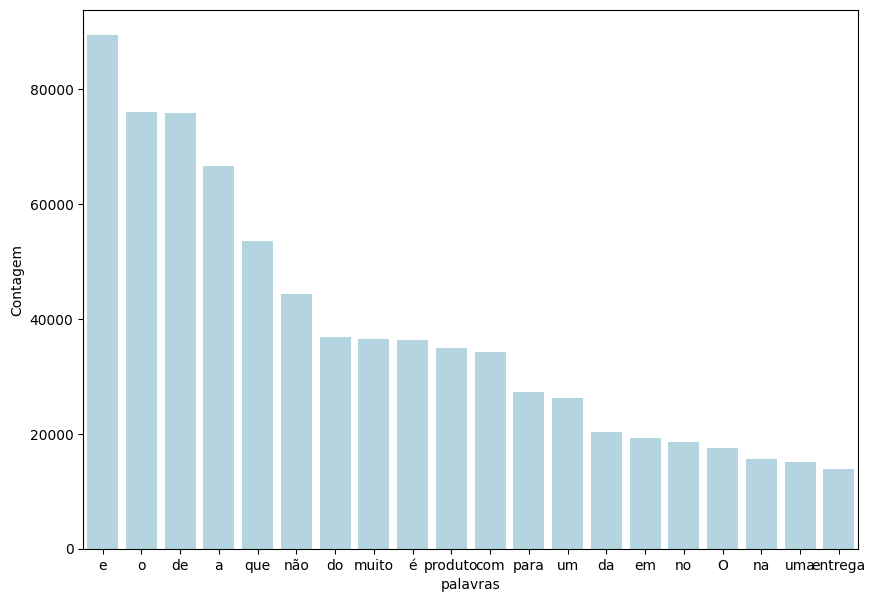

In [39]:
grafico(avaliacoes, 'review_text', 20)

In [40]:
# Stop Word
# O NLTK possu uma lista de palavras que nomeia como stop word, palavras sem relevância para análise do PLN
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [41]:
frase_processada = list()
for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto = token_por_espaco.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stop_words"] = frase_processada

In [42]:
avaliacoes.head()

,review_text,polarity,texto_sem_stop_words
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco..."


In [43]:
treinar_modelo(avaliacoes, "texto_sem_stop_words", "polarity")

0.8798466310529036

In [44]:
treinar_modelo(avaliacoes, "review_text", "polarity")

0.8897983801481992

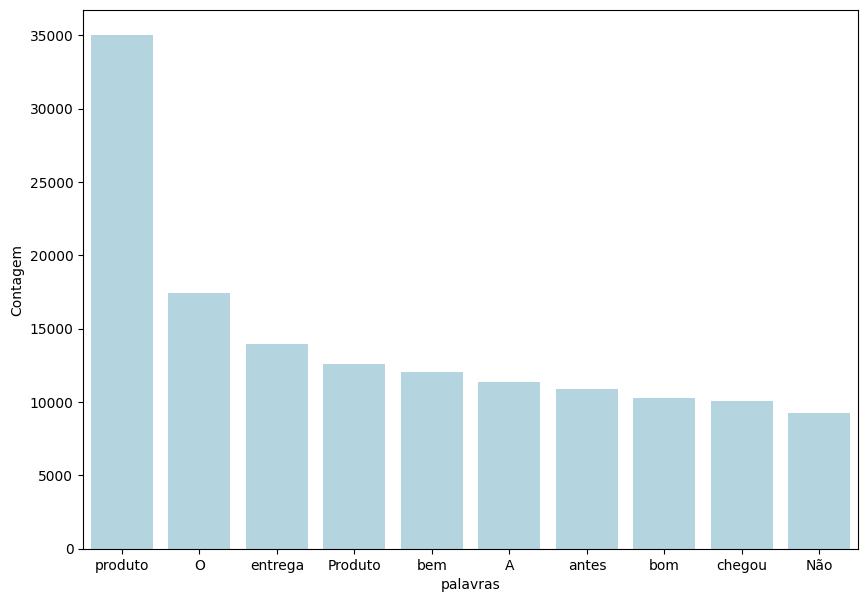

In [45]:
grafico(avaliacoes, "texto_sem_stop_words", 10)

In [46]:
# Observa-se que mesmo sem as stop words o desempenho não melhorou, isso deve-se ao fato de ainda ter muitas palavras
# stop words com pontuação, por essa razão ainda se faz necessário um novo pré processamento.

from nltk import tokenize

frase = "Muito bom, este produto."

token_por_espaco = tokenize.WordPunctTokenizer() #Tokeniza separando por espaços e pontuação
token_frase = token_por_espaco.tokenize(frase)
token_frase

['Muito', 'bom', ',', 'este', 'produto', '.']

In [47]:
# Visualizar todas as pontuações contidas no nltk
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
pontuacao = list()

for ponto in punctuation:
  pontuacao.append(ponto)

pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [49]:
pontuacao_stopword  = pontuacao + palavras_irrelevantes

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stop_words:
  nova_frase = list()
  palavras_texto = token_por_espaco.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopword:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stop_words_e_pontuacao"] = frase_processada

In [50]:
avaliacoes.head()

,review_text,polarity,texto_sem_stop_words,texto_sem_stop_words_e_pontuacao
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...


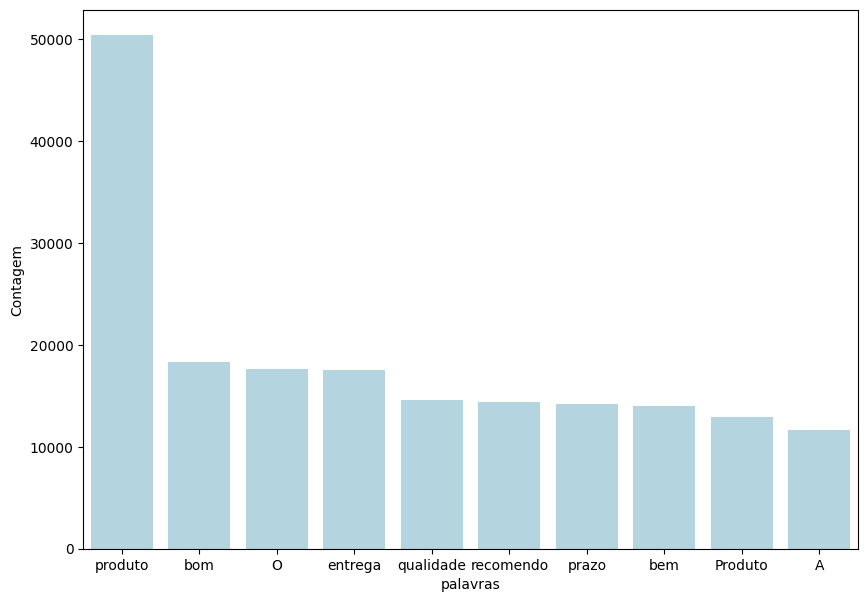

In [51]:
grafico(avaliacoes, "texto_sem_stop_words_e_pontuacao", 10)

In [52]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 14.8 MB/s eta 0:00:00


In [53]:
# Utiliza-se o unidecode para remover os acentos não removidos no nltk
import unidecode

acentos = "ótimo péssimo café não tão é"

teste = unidecode.unidecode(acentos)
teste

'otimo pessimo cafe nao tao e'

In [54]:
sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stop_words_e_pontuacao]

In [55]:
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopword]
stopwords_sem_acentos

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [56]:
avaliacoes["texto_sem_stop_words_e_pontuacao_e_acentos"] = sem_acentos

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stop_words_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto = token_por_espaco.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acentos:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stop_words_e_pontuacao_e_acentos"] = frase_processada

In [57]:
avaliacoes.head()

,review_text,polarity,texto_sem_stop_words,texto_sem_stop_words_e_pontuacao,texto_sem_stop_words_e_pontuacao_e_acentos
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...,Bem macio felpudo ... recomendo Preco imbative...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,Produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...,Bom custo beneficio Adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...


In [58]:
treinar_modelo(avaliacoes, "texto_sem_stop_words_e_pontuacao_e_acentos", "polarity")

0.8838962605548853

In [59]:
treinar_modelo(avaliacoes, "review_text", "polarity")

0.8897983801481992

In [60]:
treinar_modelo(avaliacoes, "texto_sem_stop_words", "polarity")

0.8798466310529036

In [61]:
treinar_modelo(avaliacoes, "texto_sem_stop_words_e_pontuacao", "polarity")

0.8801481992073066

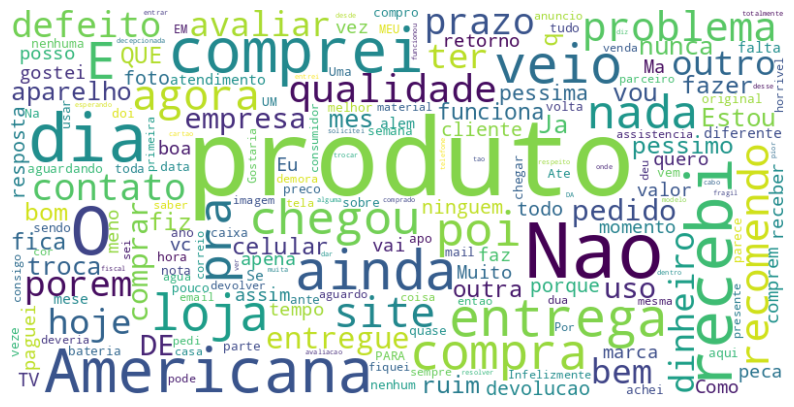

In [62]:
word_cloud_neg(avaliacoes, 'texto_sem_stop_words_e_pontuacao_e_acentos')

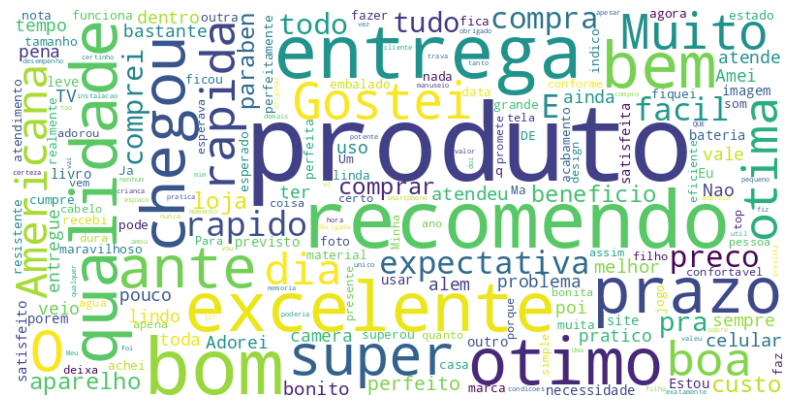

In [63]:
word_cloud_pos(avaliacoes, 'texto_sem_stop_words_e_pontuacao_e_acentos')

In [64]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stop_words_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto = token_por_espaco.tokenize(avaliacao.lower())
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acentos:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stop_words_e_pontuacao_e_acentos_minusculos"] = frase_processada

In [65]:
avaliacoes.head()

,review_text,polarity,texto_sem_stop_words,texto_sem_stop_words_e_pontuacao,texto_sem_stop_words_e_pontuacao_e_acentos,texto_sem_stop_words_e_pontuacao_e_acentos_minusculos
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...,Bem macio felpudo ... recomendo Preco imbative...,bem macio felpudo ... recomendo preco imbative...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...,Bom custo beneficio Adequado pessoas fazem uso...,bom custo beneficio adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...


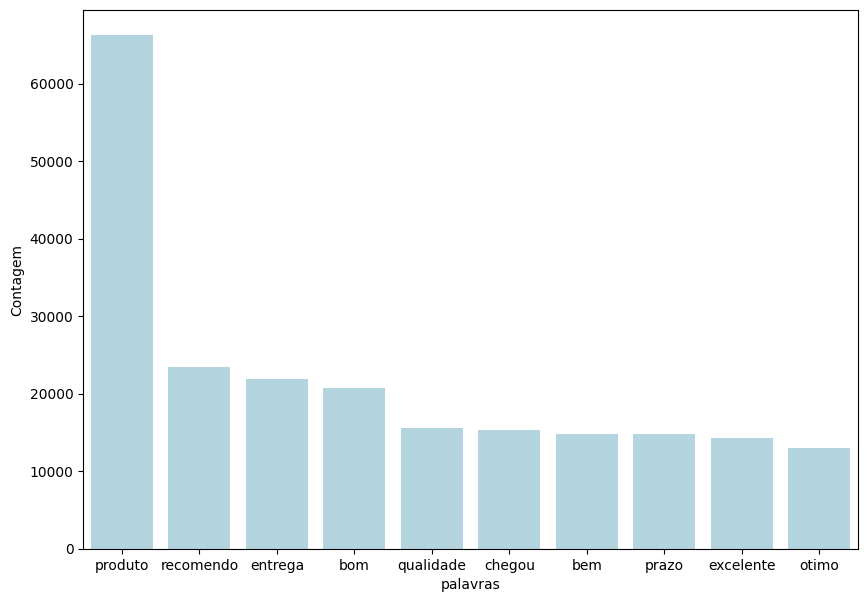

In [66]:
grafico(avaliacoes, "texto_sem_stop_words_e_pontuacao_e_acentos_minusculos", 10)

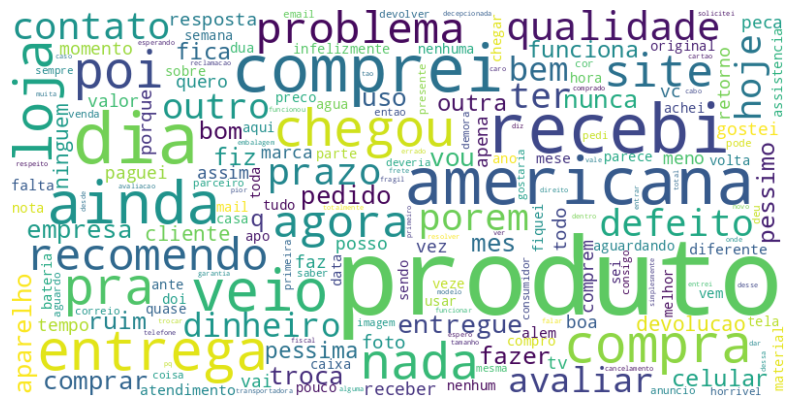

In [67]:
word_cloud_neg(avaliacoes, 'texto_sem_stop_words_e_pontuacao_e_acentos_minusculos')

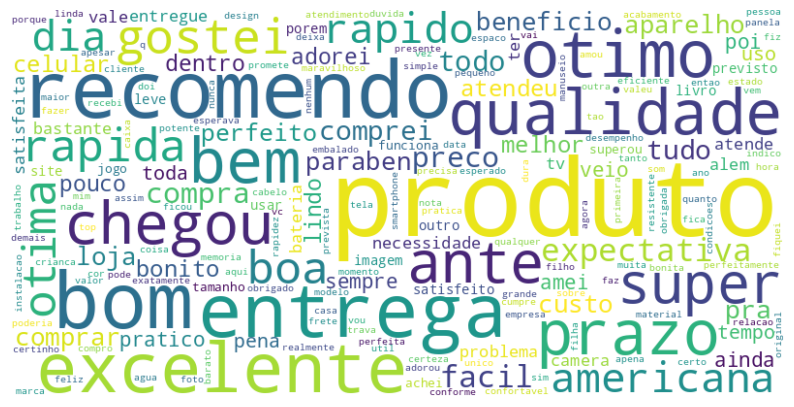

In [68]:
word_cloud_pos(avaliacoes, 'texto_sem_stop_words_e_pontuacao_e_acentos_minusculos')

##Aula 4 - Stemming TF, IDF e Ngrams##

In [69]:
# Stemming é um processo para obter o radical comum da palavras, eliminando palavras semelhantes Ex.: Produto e Produtos
# RSLP - Biblioteca do NLTK para stemming especifico do português
# Exemplo:

stemmer = nltk.RSLPStemmer()
stemmer.stem("Corredor")
stemmer.stem("Correr")
stemmer.stem("Correndo")
stemmer.stem("Correria")

'corr'

In [70]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stop_words_e_pontuacao_e_acentos_minusculos:
  nova_frase = list()
  palavras_texto = token_por_espaco.tokenize(avaliacao.lower())
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acentos:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_stemmizado"] = frase_processada

In [71]:
avaliacoes.head()

,review_text,polarity,texto_sem_stop_words,texto_sem_stop_words_e_pontuacao,texto_sem_stop_words_e_pontuacao_e_acentos,texto_sem_stop_words_e_pontuacao_e_acentos_minusculos,texto_stemmizado
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...,Bem macio felpudo ... recomendo Preco imbative...,bem macio felpudo ... recomendo preco imbative...,bem maci felpud ... recom prec imbati entreg r...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,produto excepcional recomendo !!! inovador gos...,produt excepc recom !!! inov gost ler !!
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,receb produt ant praz vei defeit tr us agor am...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...,Bom custo beneficio Adequado pessoas fazem uso...,bom custo beneficio adequado pessoas fazem uso...,bom cust benefici adequ pesso faz uso cas apar...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...,otm produt atend expect entreg ocorr ant previ...


In [72]:
print("Acuracias...")
print(f'review_text: {treinar_modelo(avaliacoes, "review_text", "polarity")}')
print(f'texto_sem_stop_words: {treinar_modelo(avaliacoes, "texto_sem_stop_words", "polarity")}')
print(f'texto_sem_stop_words_e_pontuacao: {treinar_modelo(avaliacoes, "texto_sem_stop_words_e_pontuacao", "polarity")}')
print(f'texto_sem_stop_words_e_pontuacao_e_acentos: {treinar_modelo(avaliacoes, "texto_sem_stop_words_e_pontuacao_e_acentos", "polarity")}')
print(f'texto_stemmizado: {treinar_modelo(avaliacoes, "texto_stemmizado", "polarity")}')

Acuracias...
review_text: 0.8897983801481992
texto_sem_stop_words: 0.8798466310529036
texto_sem_stop_words_e_pontuacao: 0.8801481992073066
texto_sem_stop_words_e_pontuacao_e_acentos: 0.8838962605548853
texto_stemmizado: 0.8897122178183698


TF e IDF
TF - Term Frequency
O TF avalia a frequencia de uma palavra no texto e atribui valor. Medindo a proporção do número de vezes que um termo aparece em um documento pelo número total de termos naquele documento

IDF - Inverse Document Frequency
O IDF concentra em avaliar a raridade de um termo em toda a coleção do documento


In [74]:
# Exemplo de como utilizar o TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Este produto é muito bom", "Este produto é muito ruim"]
tfid = TfidfVectorizer(lowercase=False, max_features=100)
caracteristicas = tfid.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfid.get_feature_names_out()
)

,Este,bom,muito,produto,ruim
0,0.448321,0.630099,0.448321,0.448321,0.000000
1,0.448321,0.000000,0.448321,0.448321,0.630099


In [78]:
print("Acuracias...")
print(f'review_text: {treinar_modelo(avaliacoes, "review_text", "polarity")}')
print(f'texto_sem_stop_words: {treinar_modelo(avaliacoes, "texto_sem_stop_words", "polarity")}')
print(f'texto_sem_stop_words_e_pontuacao: {treinar_modelo(avaliacoes, "texto_sem_stop_words_e_pontuacao", "polarity")}')
print(f'texto_sem_stop_words_e_pontuacao_e_acentos: {treinar_modelo(avaliacoes, "texto_sem_stop_words_e_pontuacao_e_acentos", "polarity")}')
print(f'texto_stemmizado: {treinar_modelo(avaliacoes, "texto_stemmizado", "polarity")}')

tfidf_tratado = tfid.fit_transform(avaliacoes.texto_stemmizado)

x_treino_tfifd, x_teste_tfifd, y_treino_tfifd, y_teste_tfifd = train_test_split(tfidf_tratado,
                                                                                avaliacoes.polarity,
                                                                                test_size=0.2,
                                                                                stratify=avaliacoes.polarity,
                                                                                random_state=78)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_treino_tfifd, y_treino_tfifd)
acuracia_tfifd = logistic_regression.score(x_teste_tfifd, y_teste_tfifd)

print(f'tfidf: {acuracia_tfifd}')

Acuracias...
review_text: 0.8897983801481992
texto_sem_stop_words: 0.8798466310529036
texto_sem_stop_words_e_pontuacao: 0.8801481992073066
texto_sem_stop_words_e_pontuacao_e_acentos: 0.8838962605548853
texto_stemmizado: 0.8897122178183698
tfidf: 0.8913493020851284


NGrans
N -> de número
Grams -> De granularização

Técnica que envolve a subdivisão do texto em unidades consecultivas de N palavras ou caracteres conhecidas como unigramas (N=1), bigramas (N=2), trigamas (N=3) e assim por diante.

OBSERVAÇÃO: Ngrams consome bastante poder computacional, então a utilização precisa ser feita com parcimônia.

In [81]:
# Exemplo ngrams
from nltk import ngrams

frase = "Comprei um ótimo produto"
frase_separada = token_por_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'produto')]

In [89]:
tfidf_ngrams = TfidfVectorizer(lowercase=False, ngram_range=(1,2))

tfidf_tratado_ngrams = tfidf_ngrams.fit_transform(avaliacoes.texto_stemmizado)

x_treino_ngrams, x_teste_ngrams, y_treino_ngrams, y_teste_ngrams = train_test_split(tfidf_tratado_ngrams,
                                                                                avaliacoes.polarity,
                                                                                test_size=0.2,
                                                                                stratify=avaliacoes.polarity,
                                                                                random_state=78)

# O professo não utilizou o stratify, não ficou claro o motivo, pois utilizando ficou melhor
# x_treino_ngrams, x_teste_ngrams, y_treino_ngrams, y_teste_ngrams = train_test_split(tfidf_tratado_ngrams,
#                                                                                 avaliacoes.polarity,
#                                                                                 random_state=78)

# logistic_regression = LogisticRegression(max_iter=200)
logistic_regression = LogisticRegression()
logistic_regression.fit(x_treino_ngrams, y_treino_ngrams)
acuracia_ngrams = logistic_regression.score(x_teste_ngrams, y_teste_ngrams)

print(f'tfidf_ngrams: {acuracia_ngrams}')

tfidf_ngrams: 0.9415388592107531


In [90]:
# Palavras com maiores pesos para o contexto positivo
pesos = pd.DataFrame(
    logistic_regression.coef_[0].T,
    index=tfidf_ngrams.get_feature_names_out()
)

pesos.nlargest(10, 0)

,0
otim,18.238858
excel,17.117812
bom,13.329294
perfeit,11.524558
ador,10.471024
satisfeit,8.892629
rap,8.557552
lind,8.164905
maravilh,7.788174
ame,7.586115


In [91]:
# Palavras com os maiores pesos negativos
pesos.nsmallest(10, 0)

,0
pess,-10.336148
ruim,-8.825059
frac,-7.451979
decepcion,-7.258368
receb,-7.256182
horri,-7.253708
fragil,-6.367511
devolv,-6.284075
dinh,-6.024707
vei,-5.944331
